<a href="https://www.kaggle.com/code/aminebense/a-b-testing?scriptVersionId=211038767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


# IMPORTING DATASETS

In [2]:
control_group = pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv",sep=";")
test_group = pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv",sep=";")

# Visualising the datasets

In [3]:
print(control_group.head())
print(test_group.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [4]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


# Converting the Date column to it's proper type which is Datetime

In [6]:
control_group["Date"] = pd.to_datetime(control_group["Date"], format="%d.%m.%Y")
test_group["Date"] = pd.to_datetime(test_group["Date"], format="%d.%m.%Y")

# Check if the dates have been parsed correctly
print(control_group["Date"].head())
print(test_group["Date"].head())

0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: Date, dtype: datetime64[ns]
0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: Date, dtype: datetime64[ns]


# Fixing null values

In [7]:
print(control_group.isna().sum())
print(test_group.isna().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [8]:
control_group.dropna(inplace=True)
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


# Exploring the datasets

In [9]:
print(control_group.describe())
print(test_group.describe())

                                Date  Spend [USD]  # of Impressions  \
count                             29    29.000000         29.000000   
mean   2019-08-15 20:41:22.758620672  2304.068966     109559.758621   
min              2019-08-01 00:00:00  1757.000000      71274.000000   
25%              2019-08-09 00:00:00  1962.000000      92029.000000   
50%              2019-08-16 00:00:00  2319.000000     113430.000000   
75%              2019-08-23 00:00:00  2544.000000     121332.000000   
max              2019-08-30 00:00:00  3083.000000     145248.000000   
std                              NaN   363.534822      21688.922908   

               Reach  # of Website Clicks  # of Searches  # of View Content  \
count      29.000000            29.000000      29.000000          29.000000   
mean    88844.931034          5320.793103    2221.310345        1943.793103   
min     42859.000000          2277.000000    1001.000000         848.000000   
25%     74192.000000          4085.000000   

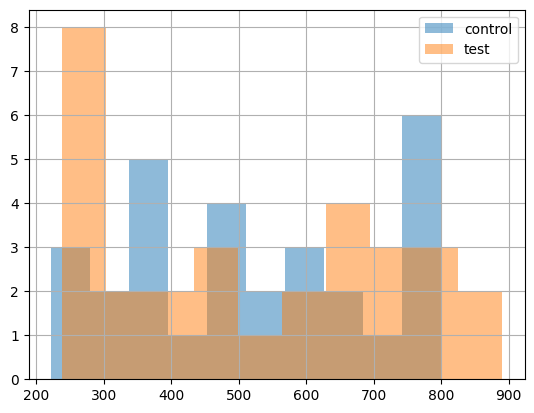

In [10]:
import matplotlib.pyplot as plt

control_group["# of Purchase"].hist(alpha=0.5,label = "control")
test_group["# of Purchase"].hist(alpha = 0.5, label = "test")
plt.legend()
plt.show()

# Calculating Mertics (Conversion rate)

In [11]:
control_group["conversion_rate"] = (control_group["# of Purchase"] / control_group["# of Website Clicks"])
test_group["conversion_rate"] = (test_group["# of Purchase"] / test_group["# of Website Clicks"])

In [12]:
print(control_group["conversion_rate"].isnull().sum())
print(test_group["conversion_rate"].isnull().sum())

0
0


In [13]:
print(control_group["conversion_rate"].describe())
print(test_group["conversion_rate"].describe())

count    29.000000
mean      0.114772
std       0.068383
min       0.033494
25%       0.063009
50%       0.102275
75%       0.143839
max       0.322354
Name: conversion_rate, dtype: float64
count    30.000000
mean      0.092312
std       0.044490
min       0.030088
25%       0.065683
50%       0.084543
75%       0.116684
max       0.210851
Name: conversion_rate, dtype: float64


# Comparing the metrics with a graph

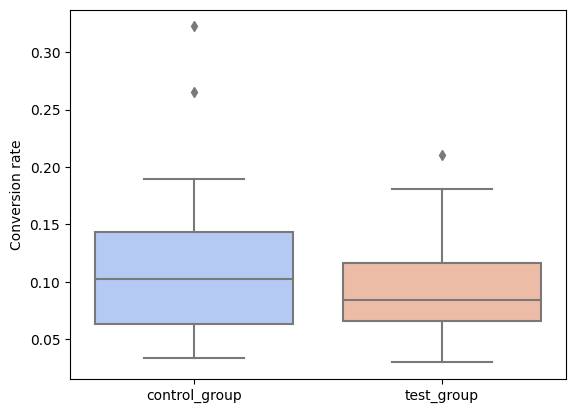

In [14]:
import seaborn as sns

sns.boxplot(data=[control_group["conversion_rate"],test_group["conversion_rate"]],palette="coolwarm")
plt.xticks([0,1],["control_group","test_group"])
plt.ylabel("Conversion rate")
plt.show()

# Performing a T test
#### to see if the differences between conversion rates are statistically significant

In [15]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(control_group["conversion_rate"],test_group["conversion_rate"],nan_policy="omit")
print(f"T-statitic : {t_stat}, P-statistic : {p_value}")

T-statitic : 1.500444703243478, P-statistic : 0.13901844271836938


#### Since the p value is bigger than 0.05 then there's no significant difference

# Visualising the Results

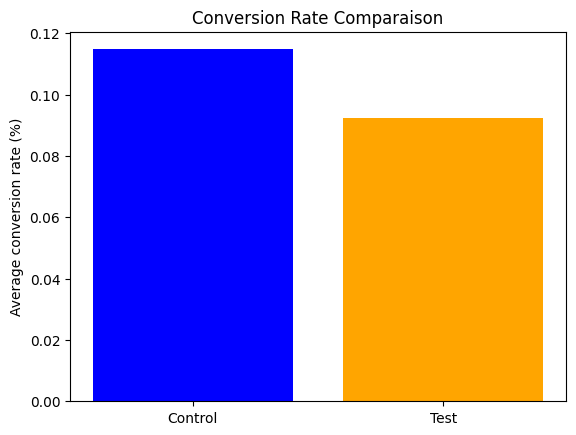

In [16]:
mean_control = control_group["conversion_rate"].mean()
mean_test = test_group["conversion_rate"].mean() 

plt.bar(["Control","Test"],[mean_control,mean_test],color=["blue","orange"])
plt.ylabel("Average conversion rate (%)")
plt.title("Conversion Rate Comparaison")
plt.show()

# Time series analysis

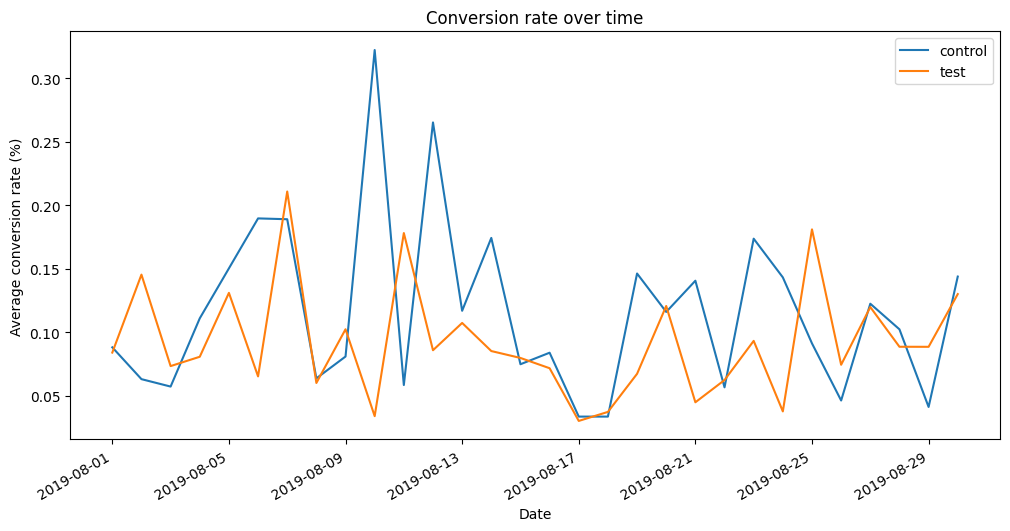

In [17]:
plt.figure(figsize=(12, 6))
control_group.groupby("Date")["conversion_rate"].mean().plot(label="control",legend=True)
test_group.groupby("Date")["conversion_rate"].mean().plot(label="test",legend=True)
plt.ylabel("Average conversion rate (%)")
plt.title("Conversion rate over time")
plt.show()

# Extracting Day name from the date column

In [18]:
control_group["Day_name"] = control_group["Date"].dt.day_name() 
test_group["Day_name"] = test_group["Date"].dt.day_name() 
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,conversion_rate,Day_name
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.088084,Thursday
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.063009,Friday
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.057160,Saturday
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.110930,Sunday
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0.189672,Tuesday


In [19]:
mean_day_control = control_group.groupby("Day_name")["conversion_rate"].mean()
mean_day_test = test_group.groupby("Day_name")["conversion_rate"].mean()
print(mean_day_control.sort_values(ascending=False))
print(mean_day_test.sort_values(ascending=False))

Day_name
Monday       0.152572
Wednesday    0.151540
Saturday     0.139054
Tuesday      0.136243
Friday       0.109044
Sunday       0.073494
Thursday     0.064825
Name: conversion_rate, dtype: float64
Day_name
Sunday       0.119253
Friday       0.108500
Wednesday    0.107328
Tuesday      0.103235
Monday       0.089587
Thursday     0.074883
Saturday     0.043707
Name: conversion_rate, dtype: float64


# How much Money was spent over time

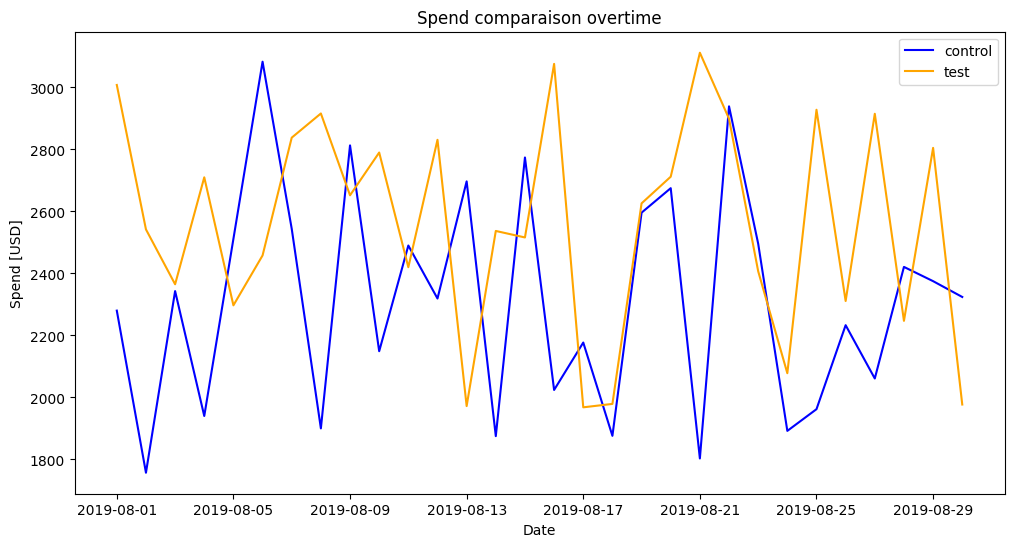

In [20]:
plt.figure(figsize=(12,6))
plt.plot(control_group["Date"],control_group["Spend [USD]"],label="control",color = "blue")
plt.plot(test_group["Date"],test_group["Spend [USD]"],label="test",color="orange")
plt.xlabel("Date")
plt.ylabel("Spend [USD]")
plt.title("Spend comparaison overtime")
plt.legend()
plt.show()